## Accès aux secteurs AIRAC

LFBB/FIR
-inf 195.0


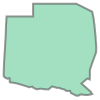

In [1]:
from traffic.data import sectors

# accès à un secteur par la notation crochet
sectors['LFBB']

LFFF/UIR
195.0 inf


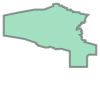

In [2]:
# si ambiguité, préciser le type de secteur
sectors['LFFF/UIR']

LFBBBDX/SECTOR_C
145.0 155.0
155.0 195.0
195.0 265.0
265.0 inf


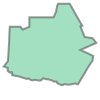

In [3]:
# on peut récupérer le type de secteur dans le champ type
# les appels sont mis en cache, donc on peut faire autant de requêtes qu'on veut
sectors['LFBBBDX']

## Lecture d'une so6

In [5]:
# Lecture du fichier zippé (avec libarchive)
from traffic.so6 import SO6
so6 = SO6.parse_file("../data/20160101_20160101_0000_2359_____m3.so6.7z")
# so6 = SO6.parse_file("../data/20160101_20160101_0000_2359_____m3.so6")

# Sérialisation 
so6.to_pkl("../data/20160101_20160101_0000_2359_____m3.pkl")

In [6]:
# Lecture de la version sérialisée
from traffic.so6 import SO6
so6 = SO6.parse_file("../data/20160101_20160101_0000_2359_____m3.pkl")

HOP32SS {193008473}:
 LFBD (2016-01-01 14:55:00) → LFRS (2016-01-01 15:30:10)


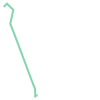

In [7]:
# Accès à un vol par la notation crochet (avec complétion)
so6['HOP32SS']

HOP32SS {193008473}:
 LFBD (2016-01-01 14:55:00) → LFRS (2016-01-01 15:30:10)


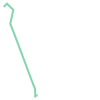

In [8]:
# Accès par l'identifiant unique
so6[193008473]

BHL205 {193002144, 193003275, 193003047}:
 ENXK (2016-01-01 08:01:14) → ENLE (2016-01-01 10:50:52)


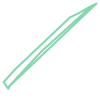

In [9]:
# Le callsign peut être associé à plusieurs identifiants uniques
so6['BHL205']

BHL205 {193002144}:
 ENZV (2016-01-01 08:01:14) → ENXK (2016-01-01 09:17:50)


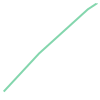

In [10]:
# On les sépare par identifiant unique
so6[193002144]

In [11]:
# La so6 est stockée sous forme de pandas.DataFrame
so6['HOP32SS'].data.head()

,origin,destination,aircraft,alt1,alt2,callsign,lat1,lon1,lat2,lon2,flight_id,time1,time2
9678,LFBD,LFRS,E145,200,500,HOP32SS,44.828611,-0.715278,44.822778,-0.724722,193008473,2016-01-01 14:55:00,2016-01-01 14:55:27
9679,LFBD,LFRS,E145,500,900,HOP32SS,44.822778,-0.724722,44.816667,-0.734444,193008473,2016-01-01 14:55:27,2016-01-01 14:55:59
9680,LFBD,LFRS,E145,900,1500,HOP32SS,44.816667,-0.734444,44.810833,-0.743889,193008473,2016-01-01 14:55:59,2016-01-01 14:56:26
9681,LFBD,LFRS,E145,1500,2500,HOP32SS,44.810833,-0.743889,44.804722,-0.753333,193008473,2016-01-01 14:56:26,2016-01-01 14:57:07
9682,LFBD,LFRS,E145,2500,3700,HOP32SS,44.804722,-0.753333,44.792778,-0.772500,193008473,2016-01-01 14:57:07,2016-01-01 14:57:50


In [12]:
# Est-ce que le vol passe dans le secteur?
so6['HOP32SS'].intersects(sectors['LFBBBDX'])

True

HOP32SS {193008473}:
 LFBD (2016-01-01 14:55:00) → LFRS (2016-01-01 15:15:35)


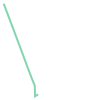

In [13]:
# Le vol est découpé sur le polygone qui correspond à l'empreinte au sol du secteur
so6['HOP32SS'].clip(sectors['LFBBBDX'].flatten())

## Interpolation et filtrage temporel des trajectoires

In [14]:
# Interpolation à une date donnée (passée en str (UTC), int (timestamp) ou datetime)
so6['HOP32SS'].at("2016/01/01 14:10")

array([[ -1.11912544e+00,   4.58866167e+01,   2.40000000e+04]])

In [15]:
# Interpolation dans un intervalle de temps (accès au dataframe par .data)
so6['HOP32SS'].between("2016/01/01 14:10", "2016/01/01 14:15").data

,lon1,lat1,alt1,lon2,lat2,alt2,aircraft,callsign,destination,flight_id,origin,time1,time2
0,-1.119125,45.886617,24000.0,-1.150278,45.969722,24000.000000,E145,HOP32SS,LFRS,193008473,LFBD,2016-01-01 15:10:00,2016-01-01 15:10:45
1,-1.150278,45.969722,24000.0,-1.301389,46.369722,24000.000000,E145,HOP32SS,LFRS,193008473,LFBD,2016-01-01 15:10:45,2016-01-01 15:14:25
2,-1.301389,46.369722,24000.0,-1.311389,46.395556,23200.000000,E145,HOP32SS,LFRS,193008473,LFBD,2016-01-01 15:14:25,2016-01-01 15:14:39
3,-1.311389,46.395556,23200.0,-1.318056,46.413056,23200.000000,E145,HOP32SS,LFRS,193008473,LFBD,2016-01-01 15:14:39,2016-01-01 15:14:49
4,-1.318056,46.413056,23200.0,-1.325894,46.433847,22602.173913,E145,HOP32SS,LFRS,193008473,LFBD,2016-01-01 15:14:49,2016-01-01 15:15:00


In [16]:
# variante avec un timedelta pour la fenêtre temporelle
from datetime import timedelta
so6['HOP32SS'].between("2016/01/01 14:10", timedelta(minutes=5)).data

,lon1,lat1,alt1,lon2,lat2,alt2,aircraft,callsign,destination,flight_id,origin,time1,time2
0,-1.119125,45.886617,24000.0,-1.150278,45.969722,24000.000000,E145,HOP32SS,LFRS,193008473,LFBD,2016-01-01 15:10:00,2016-01-01 15:10:45
1,-1.150278,45.969722,24000.0,-1.301389,46.369722,24000.000000,E145,HOP32SS,LFRS,193008473,LFBD,2016-01-01 15:10:45,2016-01-01 15:14:25
2,-1.301389,46.369722,24000.0,-1.311389,46.395556,23200.000000,E145,HOP32SS,LFRS,193008473,LFBD,2016-01-01 15:14:25,2016-01-01 15:14:39
3,-1.311389,46.395556,23200.0,-1.318056,46.413056,23200.000000,E145,HOP32SS,LFRS,193008473,LFBD,2016-01-01 15:14:39,2016-01-01 15:14:49
4,-1.318056,46.413056,23200.0,-1.325894,46.433847,22602.173913,E145,HOP32SS,LFRS,193008473,LFBD,2016-01-01 15:14:49,2016-01-01 15:15:00


In [17]:
# intersection pendant un intervalle de temps
so6['HOP32SS'].between("2016/01/01 14:10", timedelta(minutes=5)).intersects(sectors['LFBBBDX'])

True

In [18]:
# Le vol est sorti du secteur plus tard
so6['HOP32SS'].between("2016/01/01 14:20", timedelta(minutes=5)).intersects(sectors['LFBBBDX'])

False

## Filtrage spatial des trajectoires

In [19]:
# Nombre de vols dans la so6
len(so6)

17158

In [20]:
%%time
# on filtre les vols dans la bbox 2D du secteur
# (plus rapide que tester dans le secteur quand il y a beaucoup de vols)
bdx_so6 = so6.inside_bbox(sectors["LFBBBDX"])

CPU times: user 7.67 s, sys: 156 ms, total: 7.83 s
Wall time: 7.6 s


In [21]:
# le nombre de vols dans la so6
len(bdx_so6)

3033

In [22]:
# Just for fun: comparer les temps de calcul

In [23]:
%%time
noon = so6.at("2016/01/01 12:00")

CPU times: user 16.7 ms, sys: 3.82 ms, total: 20.5 ms
Wall time: 20.2 ms


In [24]:
%%time
bdx_flight = noon.intersects(sectors['LFBBBDX'])

CPU times: user 4.97 s, sys: 34 µs, total: 4.97 s
Wall time: 4.97 s


In [25]:
%%time
# attention ceci dit: ça n'est pas forcément prudent sur des petits secteurs...
bdx_flights = noon.inside_bbox(sectors['LFBBBDX']).intersects(sectors['LFBBBDX'])

CPU times: user 1.53 s, sys: 7.29 ms, total: 1.54 s
Wall time: 1.54 s


In [26]:
# Sinon on peut vérifier qu'un callsign est dans la so6
'HOP32SS' in so6.callsigns

True

In [27]:
# Le nombre de lignes par vol
len(so6['HOP32SS'])

49

In [28]:
len(bdx_flights)

67

## Properties

In [29]:
# Pour la culture
so6['HOP32SS'].coords

<generator object coords at 0x7ff90d357bf8>

In [30]:
# Mode avancé: récupérer les coordonnées (ou sinon à partir de la LineString)
import numpy as np
np.stack(so6['HOP32SS'].coords)[:5, :]

array([[ -7.15277783e-01,   4.48286111e+01,   2.00000000e+02],
       [ -7.24722217e-01,   4.48227778e+01,   5.00000000e+02],
       [ -7.34444450e-01,   4.48166667e+01,   9.00000000e+02],
       [ -7.43888883e-01,   4.48108333e+01,   1.50000000e+03],
       [ -7.53333333e-01,   4.48047222e+01,   2.50000000e+03]])

In [31]:
# Récupérer les timestamps
np.stack(so6['HOP32SS'].times)[:5]

array([Timestamp('2016-01-01 14:55:00'), Timestamp('2016-01-01 14:55:27'),
       Timestamp('2016-01-01 14:55:59'), Timestamp('2016-01-01 14:56:26'),
       Timestamp('2016-01-01 14:57:07')], dtype=object)